## Visualising the graph of folk tunes

This notebook iterates through all the tunes in the original dataset, to create a new dataset which is balanced over 25 year periods.

Then, there is code which creates a visualisation of the graph-structured dataset using the NetworkX library.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import plotly.graph_objects as go
from pyvis.network import Network

### Load tsv file into a pandas dataframe:

In [2]:
# Code_And_Data/Dataset/file_features_clean.pkl

tunes_data=pd.read_csv('./Dataset/files_features_clean.tsv',sep='\t')

In [3]:
tunes_data

,file_name,pitch_vector,rhythm_vector
0,1795_Gretna Green. VWMLa.193.abc,"[-2, -5, 0, 0, -1, 1, -3, 8, 0, 0, -1, 3, -3, ...","[0.25, 0.25, 1.0, 0.5, 0.75, 0.25, 0.5, 1.0, 0..."
1,1827_Bath Waltz. JC.168.abc,"[9, -4, -5, 9, -4, 4, 1, -3, -2, -1, 3, -3, -4...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 1.0, 0.25,..."
2,1860_Saxon Waltz. TLY.030.abc,"[1, -1, -4, 9, -2, -2, -1, -9, 5, 4, -2, -7, 4...","[1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
3,1756_Better Day Better Deed. WCD3.abc,"[2, -2, -2, -1, -2, 2, 1, -1, -2, -2, -5, 2, 2...","[1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
4,1833_Green Hills of Tyrol. LW.099.abc,"[5, 2, 2, -4, 4, 1, 2, 2, -5, 5, -2, -2, -3, -...","[0.5, 0.5, 0.5, 1.5, 0.5, 0.5, 0.5, 1.5, 0.5, ..."
...,...,...,...
13611,1837_Untitled.#15. JBs.117.abc,"[0, 5, -5, -3, -4, 0, 2, 2, 1, -1, -2, 0, 0, 0...","[0.75, 0.25, 2.0, 1.5, 0.5, 1.0, 0.5, 0.5, 0.5..."
13612,1834_Irish Washerwoman. BF12.12.abc,"[-1, -4, 0, -5, 5, 0, 4, -4, 4, 3, -2, -1, 1, ...","[1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
13613,1758_Charles's Jigg THO1.045.abc,"[-7, 0, 0, 9, -2, -7, 0, 0, 9, -2, -2, -1, 1, ...","[0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 1.0, ..."
13614,"1699_SPRING. TBr.05, THE.abc","[7, -2, 2, -2, -2, 2, -3, 5, -8, -4, 5, 2, 0, ...","[1.0, 2.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, ..."


### Balance the graph so equal number of nodes in each year bin:

In [12]:
#### 25 year balance ####

# Create empty df to store tunes and years:
balanced_yearwise_data = pd.DataFrame(columns=['tune', 'year', 'true_year'])

# Iterate through each tune in the original loaded data and add to new df, with more even year spread:
count_1650 = 0
count_1675 = 0
count_1700 = 0
count_1725 = 0
count_1750 = 0
count_1775 = 0
count_1800 = 0
count_1825 = 0
count_1850 = 0
count_1875 = 0
count_1900 = 0
tune_names_1650 = []
tune_names_1675 = []

for tune in tunes_data.index:
    tune_name  = tunes_data['file_name'][tune]   
    tune_year = tune_name[:4]
    if (1650 <= int(tune_year) < 1675) and (count_1650<100):
        if tune_name in tune_names_1650:
            print('duplicate:', tune_name)
            pass
        else:
            balanced_yearwise_data.loc[len(balanced_yearwise_data)] = ({'tune': tune_name, 'year': 1650, 'true_year': int(tune_year)})
            count_1650+=1
            tune_names_1650.append(tune_name)
    elif (1675 <= int(tune_year) < 1700) and (count_1675<100):
        if tune_name in tune_names_1675:
            pass
        else:
            balanced_yearwise_data.loc[len(balanced_yearwise_data)] = ({'tune': tune_name, 'year': 1650, 'true_year': int(tune_year)})
            count_1675+=1
            tune_names_1675.append(tune_name)
    elif (1700 <= int(tune_year) < 1725) and (count_1700<100):
        balanced_yearwise_data.loc[len(balanced_yearwise_data)] = ({'tune': tune_name, 'year': 1700, 'true_year': int(tune_year)})
        count_1700+=1
    elif (1725 <= int(tune_year) < 1750) and (count_1725<100):
        balanced_yearwise_data.loc[len(balanced_yearwise_data)] = ({'tune': tune_name, 'year': 1700, 'true_year': int(tune_year)})
        count_1725+=1
    elif (1750 <= int(tune_year) < 1775) and (count_1750<100):
        balanced_yearwise_data.loc[len(balanced_yearwise_data)] = ({'tune': tune_name, 'year': 1750, 'true_year': int(tune_year)})
        count_1750+=1
    elif (1775 <= int(tune_year) < 1800) and (count_1775<100):
        balanced_yearwise_data.loc[len(balanced_yearwise_data)] = ({'tune': tune_name, 'year': 1750, 'true_year': int(tune_year)})
        count_1775+=1
    elif (1800 <= int(tune_year) < 1825) and (count_1800<100):
        balanced_yearwise_data.loc[len(balanced_yearwise_data)] = ({'tune': tune_name, 'year': 1800, 'true_year': int(tune_year)})
        count_1800+=1
    elif (1825 <= int(tune_year) < 1850) and (count_1825<100):
        balanced_yearwise_data.loc[len(balanced_yearwise_data)] = ({'tune': tune_name, 'year': 1800, 'true_year': int(tune_year)})
        count_1825+=1
    elif (1850 <= int(tune_year) < 1875) and (count_1850<100):
        balanced_yearwise_data.loc[len(balanced_yearwise_data)] = ({'tune': tune_name, 'year': 1850, 'true_year': int(tune_year)})
        count_1850+=1
    elif (1875 <= int(tune_year) < 1900) and (count_1875<100):
        balanced_yearwise_data.loc[len(balanced_yearwise_data)] = ({'tune': tune_name, 'year': 1850, 'true_year': int(tune_year)})
        count_1875+=1
    # if (1900 <= int(tune_year) < 1925) and (count_1900<=100):
    #     count_1900+=1
    #     balanced_yearwise_data.loc[len(balanced_yearwise_data)] = ({'tune': tune_name, 'year': 1900, 'true_year': int(tune_year)})

# Save to .pkl:
balanced_yearwise_data.to_pickle('5_class_tune_year_labels.pkl')


### Create edge list:

In [14]:
edge_list = []
count = 0

# Iterate through each tune:
max_neighbours = 0
min_neighbours = 75
for tune_i in balanced_yearwise_data.index:
    num_neighbours = 0
    count+=1
    try:
        tune_i_year = int(balanced_yearwise_data['true_year'][tune_i])


        # Iterate through every other tune:

        # Shuffle indices for random iteration:
        shuffled_indices = np.random.permutation(balanced_yearwise_data.index)
        for tune_j in shuffled_indices:
            if balanced_yearwise_data['tune'][tune_i] != balanced_yearwise_data['tune'][tune_j]:
                tune_j_year = int(balanced_yearwise_data['true_year'][tune_j])

                # If tunes are < 50 years apart, create an edge between them (cost is the difference in years):
                year_diff = np.abs(tune_i_year - tune_j_year)
                if year_diff < 50:
                    edge = (balanced_yearwise_data['tune'][tune_i], balanced_yearwise_data['tune'][tune_j], year_diff)
                    edge_list.append(edge)
                    num_neighbours+=1

                    if num_neighbours >= 100:
                        break
    except:
        pass

    if num_neighbours > max_neighbours:
        max_neighbours = num_neighbours
    if num_neighbours < min_neighbours:
        min_neighbours = num_neighbours

    if count % 50 == 0:
        print(f"processed {count} tunes")
        print('Current max neighbours: ', max_neighbours)
        print('Current min neighbours: ', min_neighbours)

# Convert edge-list into a pd df and save as pickle file:
edge_df = pd.DataFrame(edge_list, columns=['node_1', 'node_2', 'cost'])

edge_df.to_pickle('5_class_edge_df_50yrN.pkl')

processed 50 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 100 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 150 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 200 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 250 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 300 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 350 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 400 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 450 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 500 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 550 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 600 tunes
Current max neighbours:  100
Current min neighbours:  75
processed 650 tunes
Current max neighbours:  100
Current min neighbours:  75


In [24]:
count

1000

### Create a networkX graph:

First we will create a new dataframe with tune objects to store tune features and their years for quick location:

In [6]:
# Create a tune class:

class Tune:
    def __init__(self, name, year, pitch_vector, rhythm_vector):
        self.name = name
        self.year = year
        self.pitch_vector = pitch_vector
        self.rhythm_vector = rhythm_vector

In [7]:
# Create empty df to store tune objects and years:
yearwise_data = pd.DataFrame(columns=['tune', 'year'])

# Iterate through each tune in the original loaded data and get info:
for tune in tunes_data.index:
    tune_name  = tunes_data['file_name'][tune]
    tune_year = tune_name[:4]
    tune_pitch_vector = tunes_data['pitch_vector'][tune]
    tune_rhythm_vector = tunes_data['rhythm_vector'][tune]

    # Create a tune object to store all info about the tune:
    tune_obj = Tune(tune_name, tune_year, tune_pitch_vector, tune_rhythm_vector)

    # Add to year-wise df:
    yearwise_data.loc[len(yearwise_data)] = ({'tune': tune_obj, 'year': tune_year})


In [8]:
yearwise_data

,tune,year
0,<__main__.Tune object at 0x7f8b39fa6ca0>,1795
1,<__main__.Tune object at 0x7f8b39f93490>,1827
2,<__main__.Tune object at 0x7f8b39f934f0>,1860
3,<__main__.Tune object at 0x7f8b39f93340>,1756
4,<__main__.Tune object at 0x7f8b39fa67f0>,1833
...,...,...
13670,<__main__.Tune object at 0x7f8b3f90a3a0>,1837
13671,<__main__.Tune object at 0x7f8b3f90ae20>,1834
13672,<__main__.Tune object at 0x7f8b3f90afd0>,1758
13673,<__main__.Tune object at 0x7f8b3f90a1f0>,1699


Now we will create an edge-list:

In [9]:
edge_list = []

# Iterate through each tune:
for tune_i in yearwise_data.index:
    try:
        tune_i_year = int(yearwise_data['year'][tune_i])
        # print('tune i: ', tune_i_year)

        # Iterate through every other tune:
        for tune_j in yearwise_data.index:
            if yearwise_data['tune'][tune_i] != yearwise_data['tune'][tune_j]:
                tune_j_year = int(yearwise_data['year'][tune_j])

                # If tunes are < 50 years apart, create an edge between them (cost is the difference in years):
                year_diff = np.abs(tune_i_year - tune_j_year)
                # print('year diff', year_diff)
                if year_diff < 50:
                    edge = (yearwise_data['tune'][tune_i], yearwise_data['tune'][tune_j], year_diff)
                    edge_list.append(edge)
    except:
        pass

In [ ]:
len(edge_list)

96053536

Lets change the edge_list so each node only has a maximum of 5 edges:

In [ ]:
edge_list = []

# Iterate through each tune:
for tune_i in yearwise_data.index:
    edge_count = 0
    tune_edges = []
    try:
        tune_i_year = int(yearwise_data['year'][tune_i])

        # Iterate through every other tune:
        for tune_j in yearwise_data.index:
            if yearwise_data['tune'][tune_i] != yearwise_data['tune'][tune_j]:
                tune_j_year = int(yearwise_data['year'][tune_j])

                # If tunes are < 100 years apart, create an edge between them (cost is the difference in years):
                year_diff = np.abs(tune_i_year - tune_j_year)
                if year_diff < 100:
                    edge = (yearwise_data['tune'][tune_i], yearwise_data['tune'][tune_j], year_diff)
                    tune_edges.append(edge)
                    edge_count+=1  
    except:
        pass
    
    # Choose 5 neighbours with a probability distribution:
    p_dist = []
    for candidate in tune_edges:
        if year_diff < 50:
            probability = 0.5
        else:
            probability = 0.25
        p_dist.append(probability)
    p_norm = [float(i)/sum(p_dist) for i in p_dist]    
    try:

        chosen_indices = np.random.choice(list(range(0,len(tune_edges))), size=5, p=p_norm)
        tune_edges = [tune_edges[i] for i in chosen_indices]
        
        # print(len(tune_edges))
    except:
        pass
    edge_list.extend(tune_edges)

len(edge_list)

16390

Now we will convert into a df and load into a networkX graph:

In [ ]:
edge_df = pd.DataFrame(edge_list, columns=['node_1', 'node_2', 'cost'])

In [ ]:
G = nx.from_pandas_edgelist(edge_df, 'node_1', 'node_2', 'cost')

Number of nodes in the graph: 13675


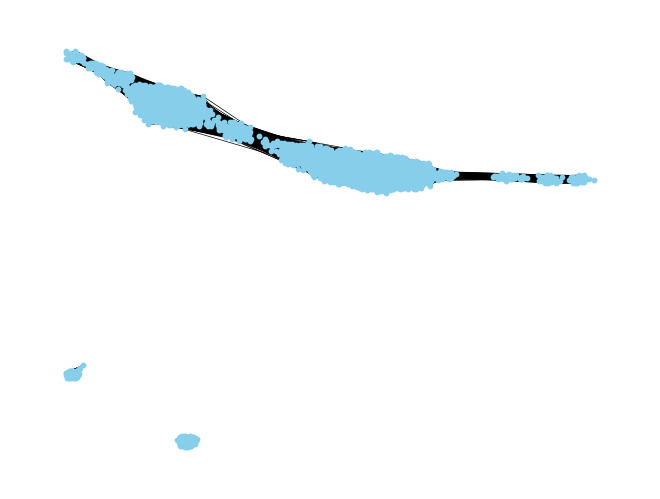

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# Number of nodes:
num_nodes = nx.number_of_nodes(G)

print("Number of nodes in the graph:", num_nodes)

# Get a subset of 100 nodes
subgraph_nodes = list(G.nodes())[:5000]

# Extract the subgraph containing only these nodes
subgraph = G.subgraph(subgraph_nodes)

# Draw the subgraph
nx.draw_spring(subgraph, with_labels=False, node_color='skyblue', node_size=10, width=0.5)
plt.figure(figsize=(20,20))
plt.show()
